# Fashion MNIST 데이터셋으로 의류 의미지 분류

## 출처: [9. Fashion MNIST 이미지 분류하기](https://codetorial.net/tensorflow/fashion_mnist_classification.html)

In [1]:
import tensorflow as tf # TensorFlow and tf.keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# TensorFlow version
print('TensorFlow version: ' + tf.__version__)

TensorFlow version: 2.7.0


### 1. MNIST 데이터 셋
- 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어짐

### 1) MNIST 데이터셋 load

In [3]:
fashion = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

In [4]:
### tf.keras.datasets.fashion_mnist
### label                    class
###   0                    T-shirt/top
###   1                      Trouser
###   2                      Pullover
###   3                       Dress
###   4                       Coat
###   5                      Sandal
###   6                      Shirt
###   7                     Sneaker
###   8                       Bag
###   9                    Ankle boot

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# visualize dataset
print(train_images.shape) # (60000, 28, 28)
print(train_labels) # [9 0 0 ... 3 0 5]
print(test_images.shape) # (10000, 28, 28)
print(test_labels) # [9 2 1 ... 8 1 5]

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)
[9 2 1 ... 8 1 5]


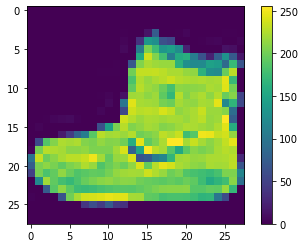

In [7]:
# train_images[0]
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### 2) 데이터 전처리

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

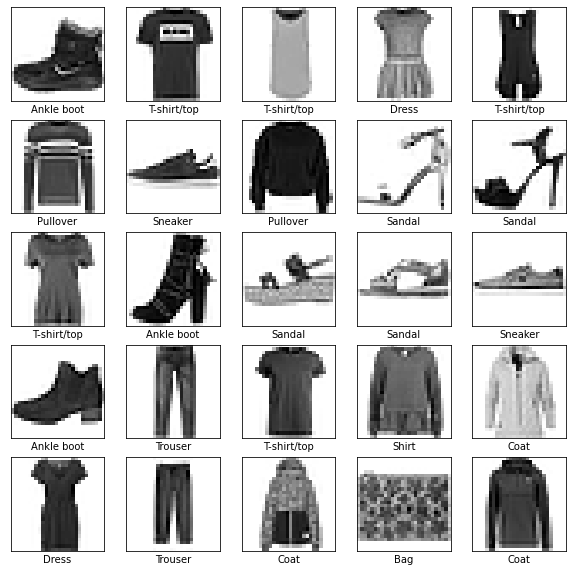

In [9]:
# 훈련 세트에서 25개 이미지 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 3) 모델 구성

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### 4) 모델 컴파일

In [11]:
# loss: 훈련과정에서 모델의 오차 측정하는데 사용
# optimizer: 데이터와 손실 함수를 바탕으로 모델의 가중치와 편향을 업데이트하는 방식
# metrics: 훈련 단계와 테스트 단계를 평가하기 위해 사용
#          accuracy로 설정 시 이미지를 올바르게 분류한 비율로 모델 평가

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 5) 모델 훈련

In [13]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4746 - accuracy: 0.8304
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3600 - accuracy: 0.8685
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3249 - accuracy: 0.8798
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2986 - accuracy: 0.8899
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2793 - accuracy: 0.8950


### 6) 모델 평가하기

In [14]:
loss, acc = model.evaluate(test_images, test_labels)
print('손실: ', loss, '정확도: ', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3784 - accuracy: 0.8680
손실:  0.3784083127975464 정확도:  0.8679999709129333


### 7) 예측하기

In [15]:
prediction = model.predict(test_images)
print('첫번째 예측: ', prediction[0])
print('가장 높은 값: ', np.argmax(prediction[0]))

첫번째 예측:  [2.3998356e-07 1.6199632e-09 7.2248248e-08 9.4964814e-10 2.0067551e-08
 2.1675992e-01 8.9059711e-08 1.4944972e-02 6.4760286e-07 7.6829404e-01]
가장 높은 값:  9


## 2. 뉴런의 개수의 영향
- 뉴런 노드의 개수를 128, 512, 1024로 변화시키면서 세 경우에 대해 훈련 과정의 손실과 정확도 확인

### 1) 모델 구성

In [16]:
case1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
case2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [18]:
case3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### 2) 모델 컴파일

In [19]:
case1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
case2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
case3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3) 모델 훈련

In [22]:
case1.fit(train_images, train_labels, epochs=20)
print('----------------------------------------')
case2.fit(train_images, train_labels, epochs=20)
print('----------------------------------------')
case3.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4959 - accuracy: 0.8264
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3735 - accuracy: 0.8647
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3359 - accuracy: 0.8782
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3129 - accuracy: 0.8859
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2943 - accuracy: 0.8912
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2822 - accuracy: 0.8963
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2686 - accuracy: 0.8995
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2582 - accuracy: 0.9044
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2490 - accuracy: 0.9072
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.240

### 4) 모델 정확도 평가

In [23]:
loss1, acc1 = case1.evaluate(test_images, test_labels)
print('뉴런 노드가 128일때 손실은 ', loss1, '정확도는 ', acc1)
loss2, acc2 = case2.evaluate(test_images, test_labels)
print('뉴런 노드가 512일때 손실은 ', loss2, '정확도는 ', acc2)
loss3, acc3 = case3.evaluate(test_images, test_labels)
print('뉴런 노드가 1024일때 손실은 ', loss3, '정확도는 ', acc3)

313/313 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8843
뉴런 노드가 128일때 손실은  0.3571784794330597 정확도는  0.8842999935150146
313/313 [==============================] - 1s 2ms/step - loss: 0.3870 - accuracy: 0.8859: 0s - loss: 0.3900 - 
뉴런 노드가 512일때 손실은  0.38697296380996704 정확도는  0.8859000205993652
313/313 [==============================] - 1s 2ms/step - loss: 0.3734 - accuracy: 0.8924
뉴런 노드가 1024일때 손실은  0.37339600920677185 정확도는  0.8924000263214111


## 3. 예측 함수

In [26]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [27]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## 4. 예측 확인

### 1) 1개의 이미지 예측

#### [1] 0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인

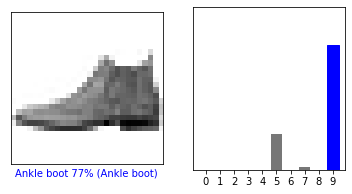

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

#### [2] 12번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인

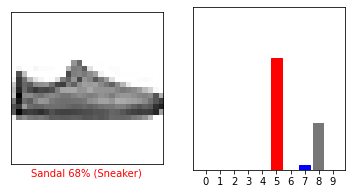

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

#### [3] 여러 이미지, 예측, 신뢰도 점수 배열 확인

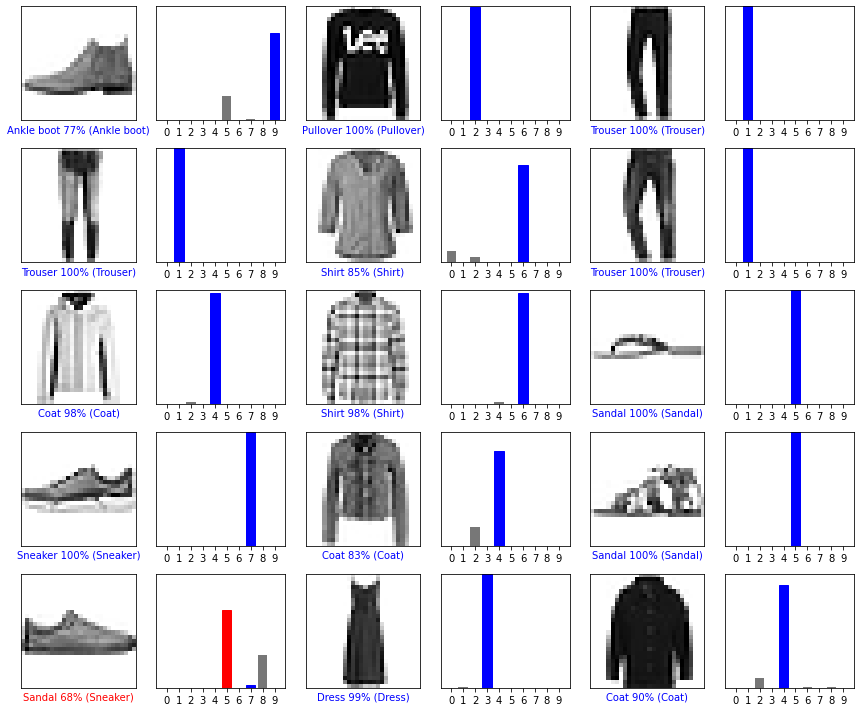

In [31]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, prediction[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()

## 5. 훈련된 모델 사용

In [32]:
img = test_images[1]
print(img.shape)

(28, 28)


In [33]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [41]:
# 이미지에 대한 예측
predictions1_single = case1.predict(img)
print(predictions1_single)
predictions2_single = case2.predict(img)
print(predictions2_single)
predictions3_single = case3.predict(img)
print(predictions3_single)

[[1.9054343e-04 2.0537140e-15 9.9975926e-01 3.1158665e-10 4.2928183e-05
  5.2568071e-20 7.2272792e-06 5.8004568e-25 2.1829788e-12 2.7527601e-21]]
[[2.3368630e-04 1.4877214e-17 9.9954551e-01 5.5434402e-15 1.5194067e-04
  7.3692172e-12 6.8930458e-05 4.2825309e-21 2.4251914e-13 2.8465377e-12]]
[[6.53306415e-06 1.17479026e-20 9.99974608e-01 3.87984853e-19
  1.86717843e-05 5.37711032e-19 2.71005490e-07 2.23246638e-35
  1.79333956e-18 1.52311118e-22]]


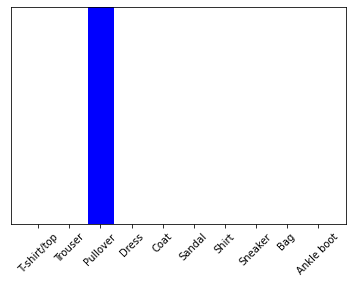

In [42]:
plot_value_array(1, predictions1_single[0], test_labels)
xtick = plt.xticks(range(10), class_names, rotation=45)
plt.show()

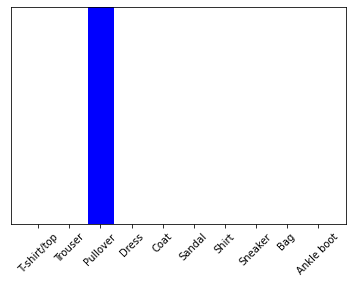

In [43]:
plot_value_array(1, predictions2_single[0], test_labels)
xtick = plt.xticks(range(10), class_names, rotation=45)
plt.show()

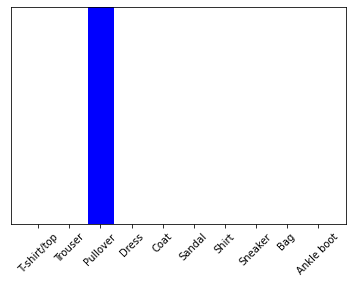

In [44]:
plot_value_array(1, predictions3_single[0], test_labels)
xtick = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [45]:
print('case1(nueron node 128): ', np.argmax(predictions1_single[0]))
print('case2(nureon node 512): ', np.argmax(predictions2_single[0]))
print('case2(nureon node 1024): ', np.argmax(predictions3_single[0]))

case1(nueron node 128):  2
case2(nureon node 512):  2
case2(nureon node 1024):  2
